In [1]:
import numpy as np
import pandas as pd

### key for the categorical variables
df_key = pd.read_excel('Dataset for submission.xlsx', sheet_name = 'Metadata')

### data for the model input and target output
df = pd.read_excel('Dataset for submission.xlsx', sheet_name = 'Data')

dataset= df.iloc[:,1:].values

# Metadata

In [2]:
df_key

,Link to Paper,Copper?,Any other metal?,"If any other metal, which one?",Copper oxidation number,Copper particle size (nm),Thickness of copper layer (nm),Surface relative roughness (dimensionless),Support for copper,Copper facet #1,Copper facet #2,Copper facet #3,Major product #1,Major product #2,Major product #3
0,Paste the DOI based link,0 if there is no copper in the catalyst,"0 if there is not any other metal, i.e. just p...","0 if there is not any other metal, i.e. just p...","0 if Cu^0, i.e. mettalic copper",Please insert number in nm,Please insert number in nm,"Please insert relative roughness, a dimensiole...","0 if copper in unsupported, for example it is ...",Copper facet should be referenced by its Mille...,NaN,NaN,1 if main product is H2 (hydrogen gas),NaN,NaN
1,NaN,1 if there is copper in the catalyst,"1 if there is another metal, whatever it is",1 for Fe,"1 if Cu^(+1), for example Cu2O","If not reported, please enter 0","If not reported, please enter 0","If not reported, please enter 0","1 if support is a metallic plane surface, for ...",Copper facet #1 is for the first string [XYZ] ...,NaN,NaN,2 if main product is CO (carbon monoxide),NaN,NaN
2,NaN,NaN,Please note copper oxides / nitrides are still...,2 for Ni,"2 if Cu^(2+), for example CuO",NaN,NaN,NaN,"2 if support is a rough organic surface, for e...",Copper facet #2 is for the second string [XYZ]...,NaN,NaN,3 if main product is CH4 (methane),NaN,NaN
3,NaN,NaN,NaN,3 for Pt,If it is a blend of copper with different oxid...,NaN,NaN,NaN,3 if support is explicitly mentioned as a nano...,Copper facet #3 is for the third string [XYZ] ...,NaN,NaN,4 if main product is HCOOH / HCOO- (formic aci...,NaN,NaN
4,NaN,NaN,NaN,4 for Pd,NaN,NaN,NaN,NaN,4 if support is nanotubes / nanowires,Please enter just the numbers XYZ without brac...,NaN,NaN,5 if main product is C2H4 (ethylene),NaN,NaN
5,NaN,NaN,NaN,5 for Ag,NaN,NaN,NaN,NaN,5 if support is nanospikes,If copper is polycrystalline and facets are no...,NaN,NaN,6 is main product is C2H6 (ethane),NaN,NaN
6,NaN,NaN,NaN,6 for Au,NaN,NaN,NaN,NaN,6 if support is any type of custom-made nanocage,"If not reported, please enter 0",NaN,NaN,7 if main product is C2H5OH (ethanol),NaN,NaN
7,NaN,NaN,NaN,7 for Zn,NaN,NaN,NaN,NaN,"Please if you find any other support, or are u...",NaN,NaN,NaN,8 if main product is C3H8 (propane),NaN,NaN
8,NaN,NaN,NaN,8 for Cd,NaN,NaN,NaN,NaN,7 if nanoflower,NaN,NaN,NaN,9 if main product is C3H6 (propylene),NaN,NaN
9,NaN,NaN,NaN,9 for Pb,NaN,NaN,NaN,NaN,8 if nanofoam,NaN,NaN,NaN,10 if main product is C3H7OH (propanol),NaN,NaN


# Data from literature

In [3]:
df

,Link to Paper,Copper?,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Surface relative roughness (dimensionless),Copper facet #1,Copper facet #2,Copper facet #3,Major product #1
0,https://doi.org/10.1016/j.electacta.2018.03.156,1,1,8,0,1.0,200000.0,0.0,0.0,2,101,200,2
1,https://doi.org/10.1021/acscatal.8b02587,1,0,0,0,1.5,0.0,0.0,0.0,111,110,211,5
2,https://doi.org/10.1016/0039-6028(95)00441-6,1,0,0,1,0.0,0.0,0.0,0.0,0,0,0,5
3,https://www.sciencedirect.com/science/article/...,1,0,0,0,0.0,0.0,0.0,0.0,100,110,111,3
4,https://www.sciencedirect.com/science/article/...,1,1,2,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://doi.org/10.1021/ja500328k,1,0,0,11,0.0,15.1,0.0,0.0,111,100,0,1
96,https://doi.org/10.1021/ja500328k,1,0,0,0,0.0,0.0,0.0,0.0,111,100,0,3
97,https://doi.org/10.1021/acsenergylett.0c00482,1,0,0,0,0.0,0.0,40000.0,2.6,100,111,0,5
98,https://doi.org/10.1038/s41467-018-03286-w,1,0,0,0,0.0,1000.0,0.0,1.4,100,111,0,1


# Data Management & Organization

In [4]:
nondoi_cols = df.columns[1:] #df.columns[0] is doi of data
df.loc[:, nondoi_cols].values

array([[  1.,   1.,   8., ..., 101., 200.,   2.],
       [  1.,   0.,   0., ..., 110., 211.,   5.],
       [  1.,   0.,   0., ...,   0.,   0.,   5.],
       ...,
       [  1.,   0.,   0., ..., 111.,   0.,   5.],
       [  1.,   0.,   0., ..., 111.,   0.,   1.],
       [  1.,   0.,   0., ..., 111.,   0.,   1.]])

In [5]:
# There are no null data! But there are data which are not available which 
# are substituted as '0' to ensure that we have not missed any data point
df[pd.isnull(df).values]

,Link to Paper,Copper?,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Surface relative roughness (dimensionless),Copper facet #1,Copper facet #2,Copper facet #3,Major product #1


In [6]:
# Now, identifying the examples/rows for which data was not available during 
# literature. But only a few of the columns are required to be tested, 
# as some of the questions is a yes/no question, which do hav 100% data
# such as the columns 0:4

data_2_chk = df.drop(['Copper?','Any other metal?', 'If any other metal, which one?', 'Support for copper', \
                      'Link to Paper', 'Major product #1'], axis = 1)
n_zeros=data_2_chk.isin([0]).sum(axis=1)
# n_zeros
rows=[]
for i in range(len(n_zeros)):    
    ## dropping rows/examples where data for more than 11 features are unavailable
    if n_zeros[i]>5:                  
        rows.append(i)
df1 = df.drop(rows,axis =0)
df1

,Link to Paper,Copper?,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Surface relative roughness (dimensionless),Copper facet #1,Copper facet #2,Copper facet #3,Major product #1
0,https://doi.org/10.1016/j.electacta.2018.03.156,1,1,8,0,1.0,200000.0,0.0,0.0,2,101,200,2
1,https://doi.org/10.1021/acscatal.8b02587,1,0,0,0,1.5,0.0,0.0,0.0,111,110,211,5
3,https://www.sciencedirect.com/science/article/...,1,0,0,0,0.0,0.0,0.0,0.0,100,110,111,3
5,https://doi.org/10.1021/acsami.6b15402,1,0,0,0,0.0,220.0,0.0,0.0,110,220,0,7
7,https://doi.org/10.1002/celc.201600068,1,0,0,3,1.0,20.0,39.0,0.0,100,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://doi.org/10.1021/ja500328k,1,0,0,11,0.0,15.1,0.0,0.0,111,100,0,1
96,https://doi.org/10.1021/ja500328k,1,0,0,0,0.0,0.0,0.0,0.0,111,100,0,3
97,https://doi.org/10.1021/acsenergylett.0c00482,1,0,0,0,0.0,0.0,40000.0,2.6,100,111,0,5
98,https://doi.org/10.1038/s41467-018-03286-w,1,0,0,0,0.0,1000.0,0.0,1.4,100,111,0,1


### 21 examples/rows have thus been dropped which didnot have over 11 out of 13 features

In [7]:
### now checking the number of elements in each features in the modified dataset. It is to be noted that the 
### first 5 columns are yes/no questions and '0's here mean 'no' and not 'unavailability of data'. Thus, the
### first 5 columns are ignored

df1.isin([0]).sum(axis=0)

Link to Paper                                  0
Copper?                                        0
Any other metal?                              60
If any other metal, which one?                60
Support for copper                            34
Copper Oxidation Number                       43
Copper particle size (nm)                     21
Thickness of copper layer (nm)                46
Surface relative roughness (dimensionless)    56
Copper facet #1                               13
Copper facet #2                               26
Copper facet #3                               52
Major product #1                               3
dtype: int64

### Clearly surface relative roughness data is not available for over 75% of the data. While the value for copper facet 3 is also very low. Therefore these 2 features are being dropped!

In [8]:
df_features = df1.drop(['Copper?', 'Link to Paper','Surface relative roughness (dimensionless)', 'Copper facet #3'], axis=1)
df_features

,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Copper facet #1,Copper facet #2,Major product #1
0,1,8,0,1.0,200000.0,0.0,2,101,2
1,0,0,0,1.5,0.0,0.0,111,110,5
3,0,0,0,0.0,0.0,0.0,100,110,3
5,0,0,0,0.0,220.0,0.0,110,220,7
7,0,0,3,1.0,20.0,39.0,100,0,5
...,...,...,...,...,...,...,...,...,...
95,0,0,11,0.0,15.1,0.0,111,100,1
96,0,0,0,0.0,0.0,0.0,111,100,3
97,0,0,0,0.0,0.0,40000.0,100,111,5
98,0,0,0,0.0,1000.0,0.0,100,111,1


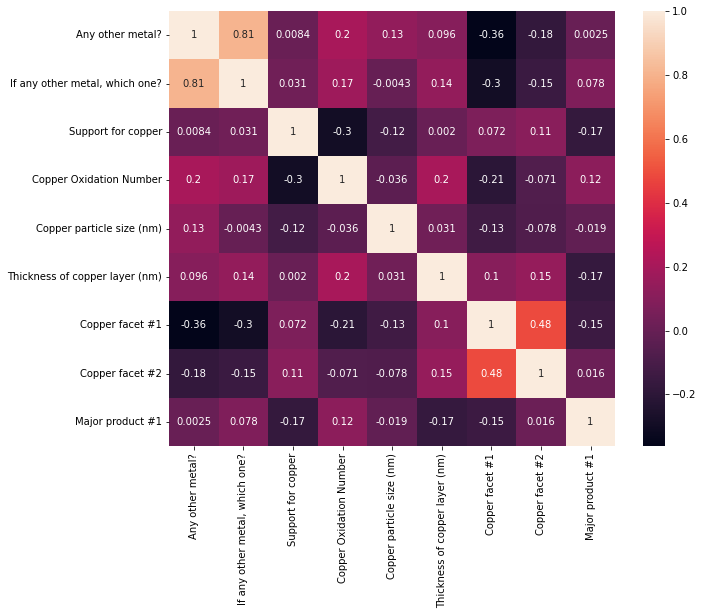

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 8))

corr = df_features.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [10]:
corr['Any other metal?']>0.85

Any other metal?                   True
If any other metal, which one?    False
Support for copper                False
Copper Oxidation Number           False
Copper particle size (nm)         False
Thickness of copper layer (nm)    False
Copper facet #1                   False
Copper facet #2                   False
Major product #1                  False
Name: Any other metal?, dtype: bool

### It can be seen that the highest correlation between features is ~0.8. So no features were removed. Thus, df_features is the final dataset.

In [11]:
df_features

,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Copper facet #1,Copper facet #2,Major product #1
0,1,8,0,1.0,200000.0,0.0,2,101,2
1,0,0,0,1.5,0.0,0.0,111,110,5
3,0,0,0,0.0,0.0,0.0,100,110,3
5,0,0,0,0.0,220.0,0.0,110,220,7
7,0,0,3,1.0,20.0,39.0,100,0,5
...,...,...,...,...,...,...,...,...,...
95,0,0,11,0.0,15.1,0.0,111,100,1
96,0,0,0,0.0,0.0,0.0,111,100,3
97,0,0,0,0.0,0.0,40000.0,100,111,5
98,0,0,0,0.0,1000.0,0.0,100,111,1


In [12]:
### Percentage of unavailable data in the final dataset 
### (note that the first 3 columns are not included as they are yes/no) questions

df_features.isin([0]).sum(axis=0)*(100/79)

Any other metal?                  75.949367
If any other metal, which one?    75.949367
Support for copper                43.037975
Copper Oxidation Number           54.430380
Copper particle size (nm)         26.582278
Thickness of copper layer (nm)    58.227848
Copper facet #1                   16.455696
Copper facet #2                   32.911392
Major product #1                   3.797468
dtype: float64

# Class imbalance: SMOTE

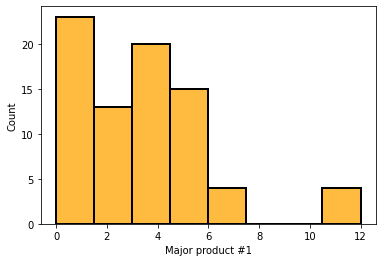

In [13]:
### the class imbalance as a function of the final product is given below 
### (each number correspond to a electrochemically produced carbon product: refer metadata)
sns.histplot(data = df_features, x ='Major product #1', linewidth =2, color = 'orange');

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


(79, 9)
Class=2, n=20 (12.500%)
Class=5, n=20 (12.500%)
Class=3, n=20 (12.500%)
Class=6, n=20 (12.500%)
Class=1, n=20 (12.500%)
Class=7, n=20 (12.500%)
Class=0, n=20 (12.500%)
Class=4, n=20 (12.500%)


Text(0, 0.5, 'Count')

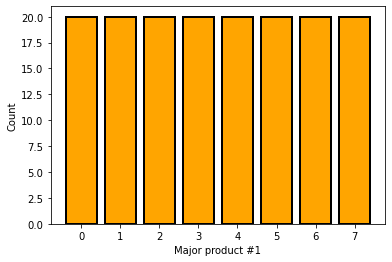

In [15]:
### SMOTE proposes several variants by identifying specific samples to consider during the resampling. 
### The SVM version (:class:`~imblearn.over_sampling.SVMSMOTE`) will use the support vectors found using 
### an SVM algorithm to create new sample (example of oversampling a multi-class classification dataset)

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = df_features.to_numpy()

print(data.shape)

X, y = data[:, 0:8], data[:, 8]

#----------------------------------------------------- label encode the target variable
y = LabelEncoder().fit_transform(y)

#----------------------------------------------------- transform the dataset
"""
Since there are approximately 9 classes and 79 samples in the training set, we have on average 8 samples per class. 
The reason for the error message is that:
a) probably the data are not perfectly balanced and there are classes with less than 6 samples and 
b) the number of neighbors is 6. A few solutions for your problem:

1- Calculate the minimum number of samples (n_samples) among the 199 classes and select n_neighbors parameter 
of SMOTE class less or equal to n_samples. (used here)

2- Exclude from oversampling the classes with n_samples < n_neighbors using the ratio parameter of SMOTE class.

3- Use RandomOverSampler class which does not have a similar restriction.
 
"""

oversample = SMOTE(k_neighbors = 2)
X, y = oversample.fit_resample(X, y)

#----------------------------------------------------- summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#----------------------------------------------------- plot the distribution
pyplot.bar(counter.keys(), counter.values(), linewidth =2, color = 'orange', edgecolor = 'k')
#pyplot.show()
plt.xlabel('Major product #1')
plt.ylabel('Count')

### We see that the classes are balanced now. 

In [16]:
facets = df_features['Copper facet #1'].unique()
facets1 = df_features['Copper facet #2'].unique()
facets = sorted(np.unique(np.concatenate((facets,facets1), axis=0)))
print(facets)

[0, 1, 2, 100, 101, 110, 111, 200, 210, 211, 220, 511]


In [17]:
### Recreating dataframe.

y = y.reshape(-1,1)
df_data = np.concatenate((X,y), axis =1)
df_features_mod = pd.DataFrame(df_data, columns=['Any other metal?', 'If any other metal, which one?', 'Support for copper', \
                                             'Copper Oxidation Number', 'Copper particle size (nm)', \
                                             'Thickness of copper layer (nm)', 'Copper facet #1', 'Copper facet #2', \
                                             'Major product #1'])
df_features_mod

,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Copper facet #1,Copper facet #2,Major product #1
0,1.000000,8.000000,0.000000,1.000000,200000.000000,0.0,2.000000,101.000000,2.0
1,0.000000,0.000000,0.000000,1.500000,0.000000,0.0,111.000000,110.000000,5.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,110.000000,3.0
3,0.000000,0.000000,0.000000,0.000000,220.000000,0.0,110.000000,220.000000,6.0
4,0.000000,0.000000,3.000000,1.000000,20.000000,39.0,100.000000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...
155,0.770683,5.394780,3.770683,0.770683,6.541366,0.0,102.522488,131.409222,7.0
156,0.449635,3.147445,3.449635,0.449635,5.899270,0.0,106.054014,159.982480,7.0
157,0.785897,5.501279,3.785897,0.785897,6.571794,0.0,102.355132,130.055162,7.0
158,0.701336,4.909353,3.701336,0.701336,6.402672,0.0,103.285302,137.581082,7.0


In [18]:
### It can be seen that SMOTE randomly assigned values to all these features, most of which donot have meaning.
### So we decided to round off these values to the closes integer for the first 4 columns, while for the facets,
### the obtained data was rounded off to the nearest facet using the code below

for i in range(8):
    for j in range(len(X)):
        if i==0 or i==3:
            X[j,i] = round(X[j,i])
        
        if i==1:
            X[j,i] = round(X[j,i])
            if X[j,i]>15:
                 X[j,i]=15
        
        if i==2:
            X[j,i] = round(X[j,i])
            if X[j,i]>14:
                 X[j,i]=14
        
        if i>5:
            temp = X[j,i]

            if temp <= min(facets):
                X[j,i] = min(facets)
                
            elif temp >= max(facets):
                X[j,i] = max(facets)
                
            else:
                k=0
                for k in range(len(facets)-1):
                    if temp >= facets[k] and temp < facets[k+1]:   
                        if temp >= ((facets[k] + facets [k+1])/2):
                            X[j,i] = facets[k+1]
                        if temp < ((facets[k] + facets [k+1])/2):
                            X[j,i] = facets[k]
        
df_data = np.concatenate((X,y), axis =1)
df_features = pd.DataFrame(df_data, columns=['Any other metal?', 'If any other metal, which one?', 'Support for copper', \
                                             'Copper Oxidation Number', 'Copper particle size (nm)', \
                                             'Thickness of copper layer (nm)', 'Copper facet #1', 'Copper facet #2', \
                                             'Major product #1'])
df_features

,Any other metal?,"If any other metal, which one?",Support for copper,Copper Oxidation Number,Copper particle size (nm),Thickness of copper layer (nm),Copper facet #1,Copper facet #2,Major product #1
0,1.0,8.0,0.0,1.0,200000.000000,0.0,2.0,101.0,2.0
1,0.0,0.0,0.0,2.0,0.000000,0.0,111.0,110.0,5.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,110.0,3.0
3,0.0,0.0,0.0,0.0,220.000000,0.0,110.0,220.0,6.0
4,0.0,0.0,3.0,1.0,20.000000,39.0,100.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
155,1.0,5.0,4.0,1.0,6.541366,0.0,101.0,111.0,7.0
156,0.0,3.0,3.0,0.0,5.899270,0.0,110.0,200.0,7.0
157,1.0,6.0,4.0,1.0,6.571794,0.0,101.0,111.0,7.0
158,1.0,5.0,4.0,1.0,6.402672,0.0,101.0,111.0,7.0


# Data preparation: One hot encoding

In [19]:
## number of unique labels in each column
print('\033[1m' + '\033[4m'+ "Any other metal?" + '\033[0m', len(df_features['Any other metal?'].unique()))
print('\033[1m' + '\033[4m'+"If any other metal, which one?" + '\033[0m', len(df_features['If any other metal, which one?'].unique()))
print('\033[1m' + '\033[4m'+"Support for copper" + '\033[0m', len(df_features['Support for copper'].unique()))
print('\033[1m' + '\033[4m'+"Copper Oxidation Number" + '\033[0m', len(df_features['Copper Oxidation Number'].unique()))
print('\033[1m' + '\033[4m'+"Copper particle size (nm)"+ '\033[0m', len(df_features['Copper particle size (nm)'].unique()))
print('\033[1m' + '\033[4m'+"Thickness of copper layer (nm)"+ '\033[0m', len(df_features['Thickness of copper layer (nm)'].unique()))
print('\033[1m' + '\033[4m'+"Copper facet #1"+ '\033[0m', len(df_features['Copper facet #1'].unique()))
print('\033[1m' + '\033[4m'+"Copper facet #2"+ '\033[0m', len(df_features['Copper facet #2'].unique()))
print('\033[1m' + '\033[4m'+"Major product #1"+ '\033[0m', len(df_features['Major product #1'].unique()))

Any other metal? 2
If any other metal, which one? 15
Support for copper 14
Copper Oxidation Number 3
Copper particle size (nm) 99
Thickness of copper layer (nm) 83
Copper facet #1 8
Copper facet #2 11
Major product #1 8


In [20]:
#importing libraries
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df_features['Any other metal?']=df_features['Any other metal?'].astype('category')
df_features['If any other metal, which one?']=df_features['If any other metal, which one?'].astype('category')
df_features['Support for copper']=df_features['Support for copper'].astype('category')
df_features['Copper Oxidation Number']=df_features['Copper Oxidation Number'].astype('category')
df_features['Copper facet #1']=df_features['Copper facet #1'].astype('category')
df_features['Copper facet #2']=df_features['Copper facet #2'].astype('category')

# the data is already label encoded (Assigning numerical values and storing it in another columns), so onehot encoding
# can be done using scikitlearn. Creating an instance of One-hot-encoder:
enc=OneHotEncoder()

#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(df_features[['Any other metal?', 'If any other metal, which one?', \
                                                     'Support for copper', 'Copper Oxidation Number', \
                                                     'Copper facet #1', 'Copper facet #2']]).toarray())

print(enc_data)

      0    1    2    3    4    5    6    7    8    9   ...   43   44   45  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
155  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
156  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
157  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
158  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
159  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   

      46   47   48   49   50   51   52  
0    1.0  0.0  0.0  0.0  0.0  0.0 

### The in-built encoding system in sci-kit learn is a very useful tool, but the lables of multiple features are squentially numbered, making it very difficult to identify these newly formed features later.

In [21]:
one_hot_encoded_data = pd.get_dummies(df_features, columns = ['Any other metal?', 'If any other metal, which one?', \
                                                              'Support for copper', 'Copper Oxidation Number', \
                                                              'Copper facet #1', 'Copper facet #2'])
one_hot_encoded_data = one_hot_encoded_data.drop(['Copper particle size (nm)', 'Thickness of copper layer (nm)', \
                                                 'Major product #1'], axis =1) 
one_hot_encoded_data

,Any other metal?_0.0,Any other metal?_1.0,"If any other metal, which one?_0.0","If any other metal, which one?_1.0","If any other metal, which one?_2.0","If any other metal, which one?_3.0","If any other metal, which one?_4.0","If any other metal, which one?_5.0","If any other metal, which one?_6.0","If any other metal, which one?_7.0",...,Copper facet #2_1.0,Copper facet #2_2.0,Copper facet #2_100.0,Copper facet #2_101.0,Copper facet #2_110.0,Copper facet #2_111.0,Copper facet #2_200.0,Copper facet #2_211.0,Copper facet #2_220.0,Copper facet #2_511.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
156,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
157,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
158,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
X_enc = df_features.to_numpy()

X1 = np.array(X[:,4:6])
y = X_enc[:,8]

X = np.concatenate((X1, one_hot_encoded_data), axis =1)

print(X.shape)

(160, 55)


In [23]:
#Feature identifier block

feature_names = ['Copper particle size (nm)', 'Thickness of copper layer (nm)']

for name in one_hot_encoded_data.columns:
    if name =='Any other metal?_0.0':
        feature_names.append('Presence of another metal: False')
    elif name =='Any other metal?_1.0':
        feature_names.append('Presence of another metal: True')
    elif name =='If any other metal, which one?_0.0':
        feature_names.append('Alloying?_No')
    elif name == 'If any other metal, which one?_1.0':
        feature_names.append('Alloying? Yes_Fe')
    elif name == 'If any other metal, which one?_2.0':
        feature_names.append('Alloying? Yes_Ni')
    elif name == 'If any other metal, which one?_3.0':
        feature_names.append('Alloying? Yes_Pt')
    elif name == 'If any other metal, which one?_4.0':
        feature_names.append('Alloying? Yes_Pd')
    elif name == 'If any other metal, which one?_5.0':
        feature_names.append('Alloying? Yes_Ag')
    elif name == 'If any other metal, which one?_6.0':
        feature_names.append('Alloying? Yes_Au')
    elif name == 'If any other metal, which one?_7.0':
        feature_names.append('Alloying? Yes_Zn')
    elif name == 'If any other metal, which one?_8.0':
        feature_names.append('Alloying? Yes_Cd')
    elif name == 'If any other metal, which one?_9.0':
        feature_names.append('Alloying? Yes_Pb')
    elif name == 'If any other metal, which one?_10.0':
        feature_names.append('Alloying? Yes_Sn')
    elif name == 'If any other metal, which one?_11.0':
        feature_names.append('Alloying? Yes_Co')
    elif name == 'If any other metal, which one?_12.0':
        feature_names.append('Alloying? Yes_C')
    elif name == 'If any other metal, which one?_13.0':
        feature_names.append('Alloying? Yes_Ga')
    elif name == 'If any other metal, which one?_14.0':
        feature_names.append('Alloying? Yes_Cs')
    elif name == 'If any other metal, which one?_15.0':
        feature_names.append('Alloying? Yes_MoS2')
    elif name == 'Support for copper_0.0':
        feature_names.append('Support for copper_foil')
    elif name == 'Support for copper_1.0':
        feature_names.append('Support for copper_metallic surface')
    elif name == 'Support for copper_2.0':
        feature_names.append('Support for copper_rough organic surface')
    elif name == 'Support for copper_3.0':
        feature_names.append('Support for copper_nanoporous material')
    elif name == 'Support for copper_4.0':
        feature_names.append('Support for copper_nanotubes/nanowires')
    elif name == 'Support for copper_5.0':
        feature_names.append('Support for copper_nanospikes')
    elif name == 'Support for copper_6.0':
        feature_names.append('Support for copper_nanocage')
    elif name == 'Support for copper_7.0':
        feature_names.append('Support for copper_nanoflower')
    elif name == 'Support for copper_8.0':
        feature_names.append('Support for copper_nanofoam')
    elif name == 'Support for copper_9.0':
        feature_names.append('Support for copper_Cu2ORR')
    elif name == 'Support for copper_10.0':
        feature_names.append('Support for copper_nanocrystals')
    elif name == 'Support for copper_11.0':
        feature_names.append('Support for copper_nanodendrites')
    elif name == 'Support for copper_12.0':
        feature_names.append('Support for copper_nanoribbons')
    elif name == 'Support for copper_13.0':
        feature_names.append('Support for copper_nanocubes')
    elif name == 'Support for copper_14.0':
        feature_names.append('Support for copper_dodecahedra')
    elif name == 'Copper Oxidation Number_0.0':
        feature_names.append('Copper Oxidation Number_0.0')
    elif name == 'Copper Oxidation Number_1.0':
        feature_names.append('Copper Oxidation Number_1.0')
    elif name == 'Copper Oxidation Number_2.0':
        feature_names.append('Copper Oxidation Number_2.0')
    elif name == 'Copper facet #1_0.0':
        feature_names.append('Copper facet #1_000')
    elif name == 'Copper facet #1_1.0':
        feature_names.append('Copper facet #1_001')
    elif name == 'Copper facet #1_2.0':
        feature_names.append('Copper facet #1_002')
    elif name == 'Copper facet #1_100.0':
        feature_names.append('Copper facet #1_100')
    elif name == 'Copper facet #1_101.0':
        feature_names.append('Copper facet #1_101')
    elif name == 'Copper facet #1_110.0':
        feature_names.append('Copper facet #1_110')
    elif name == 'Copper facet #1_111.0':
        feature_names.append('Copper facet #1_111')
    elif name == 'Copper facet #1_200.0':
        feature_names.append('Copper facet #1_200')
    elif name == 'Copper facet #1_210.0':
        feature_names.append('Copper facet #1_210')
    elif name == 'Copper facet #2_0.0':
        feature_names.append('Copper facet #2_000')
    elif name == 'Copper facet #2_1.0':
        feature_names.append('Copper facet #2_001')
    elif name == 'Copper facet #2_2.0':
        feature_names.append('Copper facet #2_002')
    elif name == 'Copper facet #2_100.0':
        feature_names.append('Copper facet #2_100')
    elif name == 'Copper facet #2_101.0':
        feature_names.append('Copper facet #2_101')
    elif name == 'Copper facet #2_110.0':
        feature_names.append('Copper facet #2_110')
    elif name == 'Copper facet #2_111.0':
        feature_names.append('Copper facet #2_111')
    elif name == 'Copper facet #2_200.0':
        feature_names.append('Copper facet #2_200')
    elif name == 'Copper facet #2_210.0':
        feature_names.append('Copper facet #2_210')
    elif name == 'Copper facet #2_211.0':
        feature_names.append('Copper facet #2_211')
    elif name == 'Copper facet #2_220.0':
        feature_names.append('Copper facet #2_220')
    elif name == 'Copper facet #2_511.0':
        feature_names.append('Copper facet #2_511')

feature_names = np.array(feature_names)
print(feature_names.shape)

(55,)


# Classification model: decision tree

In [24]:
from sklearn.model_selection import train_test_split

X_train_NS, X_test_NS, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
X_train_S = ss.fit_transform(X_train_NS[:, 0:2])
X_test_S = ss.transform(X_test_NS[:, 0:2])
X_S = ss.transform(X[:,0:2])

X_train = np.concatenate((X_train_S, X_train_NS[:, 2:]), axis= 1)
X_test = np.concatenate((X_test_S, X_test_NS[:, 2:]), axis= 1)
X_scaled = np.concatenate((X_S, X[:, 2:]), axis= 1)

print("Minimum: {}, Maximum: {}".format(X.min(), X.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_train.min(), X_train.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_test.min(), X_test.max()))

Minimum: 0.0, Maximum: 15000000.0
Minimum scaled: 0.0, Maximum scaled: 1.0
Minimum scaled: 0.0, Maximum scaled: 1.0


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
np.random.seed(0)

#--------------------------------------------------- just a rather fancy way to print 
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

def color_frame(value):
    if value > 0.5:
        color = 'red'
    else:
        color = 'blue'
    return 'color: %s' % color

#------------------------------------------------------- define the array of depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20]
acc_dtree_train = np.zeros(len(depths))
acc_dtree_test = np.zeros(len(depths))
acc_dtree_overall = np.zeros(len(depths))

for i in range(len(depths)):
    
    #--------------------------------------------------- train a decision tree using training data
    dtree=DecisionTreeClassifier(max_depth=depths[i])
    dtree.fit(X_train,y_train)
    
    #--------------------------------------------------- get accuracy score with the decision tree for training data
    y_predict_train = dtree.predict(X_train)
    acc_dtree_train[i] = accuracy_score(y_train, y_predict_train)
    
    #--------------------------------------------------- get accuracy score with the decision tree for test data
    y_predict_test = dtree.predict(X_test)
    acc_dtree_test[i] = accuracy_score(y_test, y_predict_test)
    
    #--------------------------------------------------- get accuracy score with the decision tree for entire data
    y_predict_overall = dtree.predict(X_scaled)
    acc_dtree_overall[i] = accuracy_score(y, y_predict_overall)
    

#--------------   print the dataframe for the accuracy scores
pd.set_option('expand_frame_repr', False)
df = pd.DataFrame(np.array([depths, acc_dtree_train, acc_dtree_test, acc_dtree_overall]).reshape(4,len(depths)).T, \
columns = ['max. depth', 'accuracy on training set','accuracy on test set', 'accuracy on entire set'])
df.style.applymap(color_frame, subset=['accuracy on test set'])

,max. depth,accuracy on training set,accuracy on test set,accuracy on entire set
0,1.000000,0.232143,0.125000,0.200000
1,2.000000,0.366071,0.229167,0.325000
2,3.000000,0.491071,0.270833,0.425000
3,4.000000,0.580357,0.229167,0.475000
4,5.000000,0.678571,0.395833,0.593750
5,6.000000,0.821429,0.500000,0.725000
6,7.000000,0.892857,0.541667,0.787500
7,8.000000,0.946429,0.520833,0.818750
8,9.000000,0.964286,0.541667,0.837500
9,10.000000,0.982143,0.500000,0.837500


## Visualization: Accuracy score and Confusion matrix

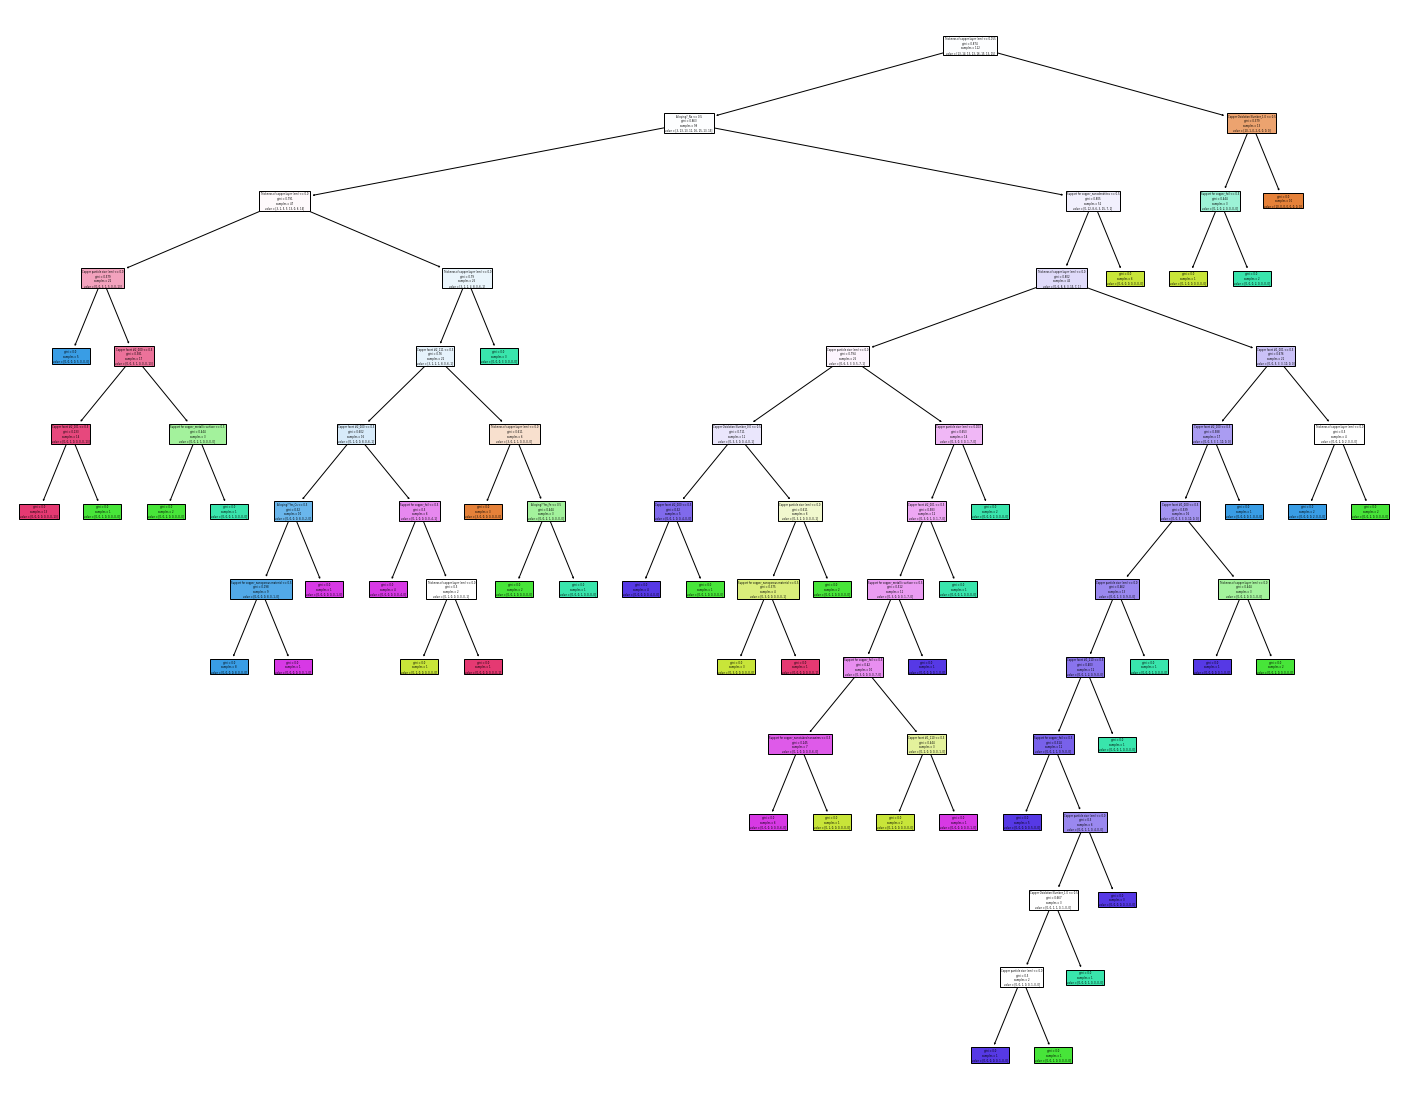

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   filled=True)

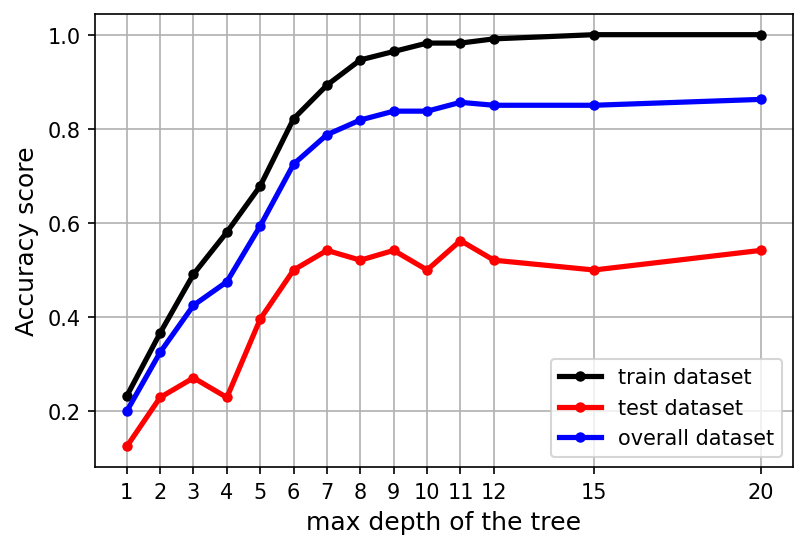

In [28]:
#--------------------------------------------- plot the accuracy score on training, test, and entire datasets wrt max depth

fig, ax = plt.subplots(figsize=(6, 4), dpi = 150) 
ax.plot(depths,acc_dtree_train, marker='o', ls='-', color='k', linewidth=2.5, \
                                                markersize=4, markerfacecolor='k', label = 'train dataset'); 
ax.plot(depths,acc_dtree_test, marker='o', ls='-', color='r', linewidth=2.5, \
                                                markersize=4, markerfacecolor='r', label = 'test dataset'); 
ax.plot(depths,acc_dtree_overall, marker='o', ls='-', color='b', linewidth=2.5, \
                                                markersize=4, markerfacecolor='b', label = 'overall dataset'); 
plt.grid()
ax.set_xlabel('max depth of the tree', fontsize=12)
ax.set_ylabel('Accuracy score', fontsize=12)
#plt.title('Accracy score of train, test and entire data sets w.r.t max depth of the tree')
ax.legend(loc="best")
plt.xticks(depths)
print()

### It can be clearly seen that as the max_depth goes over 5, there is significant difference between the test and training data accuracies. Moving forward, we will restrict the max_depth in the range between 1 and 5 to prevent overfitting. This is similar to pre-pruning the tree!

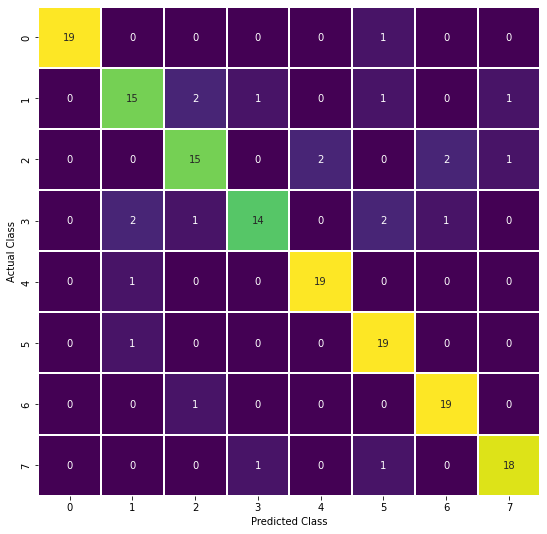

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y, y_predict_overall)
import seaborn as sns
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(cm, annot = True, linewidth = .45, cmap="viridis", cbar = False, fmt = "d", annot_kws = {'va': 'center'})
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class');

# Feature ablation

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

index=[]

X_ranks=np.zeros((100, X_scaled.shape[1]))

for r in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r)

    #------------------------------------------------------- define the array of depths
    depths = [1, 2, 3, 4, 5, 6]
    acc_dtree_train = np.zeros(len(depths))
    acc_dtree_test = np.zeros(len(depths))
    acc_dtree_overall = np.zeros(len(depths))

    for i in range(len(depths)):

        #--------------------------------------------------- train a decision tree using training data
        dtree=DecisionTreeClassifier(max_depth=depths[i])
        dtree.fit(X_train,y_train)

        #--------------------------------------------------- get accuracy score with the decision tree for training data
        y_predict_train = dtree.predict(X_train)
        acc_dtree_train[i] = accuracy_score(y_train, y_predict_train)

        #--------------------------------------------------- get accuracy score with the decision tree for test data
        y_predict_test = dtree.predict(X_test)
        acc_dtree_test[i] = accuracy_score(y_test, y_predict_test)

        #--------------------------------------------------- get accuracy score with the decision tree for entire data
        y_predict_overall = dtree.predict(X_scaled)
        acc_dtree_overall[i] = accuracy_score(y, y_predict_overall)
    
    acc_orig = max(acc_dtree_test)
    
    score=[]
    
    for dr in range(X_train.shape[1]):
        np.random.seed(0)    
        
        #calculate the new accuracy
        X_train_dropped = np.delete(X_train, dr, 1)
        X_test_dropped = np.delete(X_test, dr, 1)
        X_scaled_dropped = np.delete(X_scaled, dr, 1)
    
        np.random.seed(0)

        #------------------------------------------------------- define the array of depths
        acc_dtree_train = np.zeros(len(depths))
        acc_dtree_test = np.zeros(len(depths))
        acc_dtree_overall = np.zeros(len(depths))

        for i in range(len(depths)):
            #--------------------------------------------------- train a decision tree using training data
            dtree=DecisionTreeClassifier(max_depth=depths[i])
            dtree.fit(X_train_dropped,y_train)

            #--------------------------------------------------- get accuracy score with the decision tree for training data
            y_predict_train = dtree.predict(X_train_dropped)
            acc_dtree_train[i] = accuracy_score(y_train, y_predict_train)

            #--------------------------------------------------- get accuracy score with the decision tree for test data
            y_predict_test = dtree.predict(X_test_dropped)
            acc_dtree_test[i] = accuracy_score(y_test, y_predict_test)

            #--------------------------------------------------- get accuracy score with the decision tree for entire data
            y_predict_overall = dtree.predict(X_scaled_dropped)
            acc_dtree_overall[i] = accuracy_score(y, y_predict_overall)

        acc_ablated = max(acc_dtree_test)
        acc_diff = np.absolute(acc_orig- acc_ablated)
        score.append(acc_diff)
        ranks = np.argsort(score)
        ranks = ranks[::-1]
    X_ranks[r, :]=ranks
print(X_ranks)
print(X_ranks.shape)

[[ 4.  1. 34. ... 30. 28. 27.]
 [ 4.  1. 20. ... 44. 45. 54.]
 [ 1.  0. 33. ... 30. 41. 42.]
 ...
 [37.  1.  0. ... 28. 32. 27.]
 [ 0.  1.  4. ... 53. 32. 54.]
 [ 4.  1. 36. ... 28. 53. 27.]]
(100, 55)


Text(0, 0.5, 'Iteration Number')

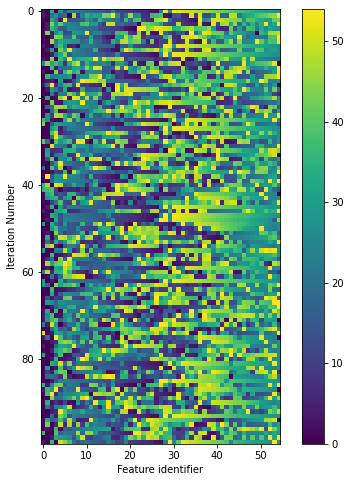

In [31]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.imshow(X_ranks)
plt.colorbar()
plt.xlabel('Feature identifier')
plt.ylabel('Iteration Number')

# Frequency Calculator

In [32]:
#Calculating number of columns in X_ranks, i.e. number of features used to train and test model
n_columns = X_ranks.shape[1]

#Retrieving the indices of the most important features, second most important and third most important 
most_important_feature = X_ranks[:,0]

#Creating arrays that will count the number of times a given feature appears as the most important feature
counter = np.bincount(most_important_feature.astype(int)).tolist()

sort_counter = sorted(counter)    

#Reporting the index of the most important features and the frequencies with which them were reported as the most important
most_important_feature_index_1 = counter.index(sort_counter[-1])
most_important_feature_1 = feature_names[most_important_feature_index_1]
frequency_1 = sort_counter[-1]

print('\033[1m' + '\033[4m'+ 'Most important feature is:' + '\033[0m'+ "\033[1;34m"+ " "+ str(most_important_feature_1) + '\033[0m'+ '\033[1m' + ' reported with a frequency of '+'\033[0m' + "\033[1;34m"+ str(frequency_1)+'\033[0m')
print()

most_important_feature_index_2 = counter.index(sort_counter[-2])
most_important_feature_2 = feature_names[most_important_feature_index_2]
frequency_2 = sort_counter[-2]

print('\033[1m' + '\033[4m'+ 'Second most important feature is:' + '\033[0m'+ "\033[1;34m"+ " "+ str(most_important_feature_2) + '\033[0m'+ '\033[1m' + ' reported with a frequency of '+'\033[0m' + "\033[1;34m"+ str(frequency_2)+'\033[0m')
print()

most_important_feature_index_3 = counter.index(sort_counter[-3])
most_important_feature_3 = feature_names[most_important_feature_index_3]
frequency_3 = sort_counter[-3]

print('\033[1m' + '\033[4m'+ 'Third most important feature is:' + '\033[0m'+ "\033[1;34m"+ " "+ str(most_important_feature_3) + '\033[0m'+ '\033[1m' + ' reported with a frequency of '+'\033[0m' + "\033[1;34m"+ str(frequency_3)+'\033[0m')


Most important feature is: Thickness of copper layer (nm) reported with a frequency of 42

Second most important feature is: Copper particle size (nm) reported with a frequency of 27

Third most important feature is: Alloying?_No reported with a frequency of 14


####  Even though these catalyst features do seem to be significant in the product distribution if we consider basic kinetic understanding of this reaction, we were skeptical to draw any conclusions from these results given their low frequencies. 

#### This led us to question if we could really extract a meaningful, discernable pattern from the data currently present in the literature. To address this question, we ran a control pipeline to get a feeling of how consistently our model was predicting these features' importance:

# Control Run

We have shuffled the array with the product labels y and ran the exact same feature ablation routine again but with shuffled labels (y_shuffled). We did this to check the model outcome on a complete junk dataset and compare it with the prediction of our actual feature ablation model.

In [33]:
from sklearn.utils import shuffle

y_shuffled = shuffle(y)

In [34]:
# Feature ablation routine

index=[]

X_ranks_shuffled=np.zeros((100, X_scaled.shape[1]))

for r in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y_shuffled, test_size=0.3, random_state=r)

    #------------------------------------------------------- define the array of depths
    depths = [1, 2, 3, 4, 5, 6]
    acc_dtree_train = np.zeros(len(depths))
    acc_dtree_test = np.zeros(len(depths))
    acc_dtree_overall = np.zeros(len(depths))

    for i in range(len(depths)):

        #--------------------------------------------------- train a decision tree using training data
        dtree=DecisionTreeClassifier(max_depth=depths[i])
        dtree.fit(X_train,y_train)

        #--------------------------------------------------- get accuracy score with the decision tree for training data
        y_predict_train = dtree.predict(X_train)
        acc_dtree_train[i] = accuracy_score(y_train, y_predict_train)

        #--------------------------------------------------- get accuracy score with the decision tree for test data
        y_predict_test = dtree.predict(X_test)
        acc_dtree_test[i] = accuracy_score(y_test, y_predict_test)

        #--------------------------------------------------- get accuracy score with the decision tree for entire data
        y_predict_overall = dtree.predict(X_scaled)
        acc_dtree_overall[i] = accuracy_score(y, y_predict_overall)
    
    acc_orig = max(acc_dtree_test)
    
    score=[]
    
    for dr in range(X_train.shape[1]):
        np.random.seed(0)    
        
        #calculate the new accuracy
        X_train_dropped = np.delete(X_train, dr, 1)
        X_test_dropped = np.delete(X_test, dr, 1)
        X_scaled_dropped = np.delete(X_scaled, dr, 1)
    
        np.random.seed(0)

        #------------------------------------------------------- define the array of depths
        acc_dtree_train = np.zeros(len(depths))
        acc_dtree_test = np.zeros(len(depths))
        acc_dtree_overall = np.zeros(len(depths))

        for i in range(len(depths)):
            #--------------------------------------------------- train a decision tree using training data
            dtree=DecisionTreeClassifier(max_depth=depths[i])
            dtree.fit(X_train_dropped,y_train)

            #--------------------------------------------------- get accuracy score with the decision tree for training data
            y_predict_train = dtree.predict(X_train_dropped)
            acc_dtree_train[i] = accuracy_score(y_train, y_predict_train)

            #--------------------------------------------------- get accuracy score with the decision tree for test data
            y_predict_test = dtree.predict(X_test_dropped)
            acc_dtree_test[i] = accuracy_score(y_test, y_predict_test)

            #--------------------------------------------------- get accuracy score with the decision tree for entire data
            y_predict_overall = dtree.predict(X_scaled_dropped)
            acc_dtree_overall[i] = accuracy_score(y, y_predict_overall)

        acc_ablated = max(acc_dtree_test)
        acc_diff = np.absolute(acc_orig- acc_ablated)
        score.append(acc_diff)
        ranks = np.argsort(score)
        ranks = ranks[::-1]
    X_ranks_shuffled[r, :]=ranks
print(X_ranks_shuffled)
print(X_ranks_shuffled.shape)

[[ 1. 20.  0. ... 51. 30. 39.]
 [39.  1. 50. ... 29. 28.  0.]
 [39.  1. 54. ... 30. 29.  0.]
 ...
 [41. 27. 13. ... 30. 29.  0.]
 [ 1. 19.  5. ... 24. 23.  0.]
 [22.  0. 24. ... 31. 32. 27.]]
(100, 55)


In [35]:
#Frequecy Calculator

#Calculating number of columns in X_ranks, i.e. number of features used to train and test model
n_columns = X_ranks_shuffled.shape[1]

#Retrieving the indices of the most important features, second most important and third most important 
most_important_feature = X_ranks_shuffled[:,0]

#Creating arrays that will count the number of times a given feature appears as the most important feature
counter = np.bincount(most_important_feature.astype(int)).tolist()

sort_counter = sorted(counter)    

#Reporting the index of the most important features and the frequencies with which them were reported as the most important
most_important_feature_index_1 = counter.index(sort_counter[-1])
most_important_feature_1 = feature_names[most_important_feature_index_1]
frequency_1 = sort_counter[-1]

print('\033[1m' + '\033[4m'+ 'Most important feature is:' + '\033[0m'+ "\033[1;34m"+ " "+ str(most_important_feature_1) + '\033[0m'+ '\033[1m' + ' reported with a frequency of '+'\033[0m' + "\033[1;34m"+ str(frequency_1)+'\033[0m')
print()

most_important_feature_index_2 = counter.index(sort_counter[-2])
most_important_feature_2 = feature_names[most_important_feature_index_2]
frequency_2 = sort_counter[-2]

print('\033[1m' + '\033[4m'+ 'Second most important feature is:' + '\033[0m'+ "\033[1;34m"+ " "+ str(most_important_feature_2) + '\033[0m'+ '\033[1m' + ' reported with a frequency of '+'\033[0m' + "\033[1;34m"+ str(frequency_2)+'\033[0m')
print()

most_important_feature_index_3 = counter.index(sort_counter[-3])
most_important_feature_3 = feature_names[most_important_feature_index_3]
frequency_3 = sort_counter[-3]

print('\033[1m' + '\033[4m'+ 'Third most important feature is:' + '\033[0m'+ "\033[1;34m"+ " "+ str(most_important_feature_3) + '\033[0m'+ '\033[1m' + ' reported with a frequency of '+'\033[0m' + "\033[1;34m"+ str(frequency_3)+'\033[0m')


Most important feature is: Copper particle size (nm) reported with a frequency of 31

Second most important feature is: Thickness of copper layer (nm) reported with a frequency of 21

Third most important feature is: Copper facet #1_100 reported with a frequency of 7


# Results

#### We note that the two most important features that show up after feature ablation with a random assignment of labels through y_shuffled is the same to the one we get after feature ablation on the correctly-assigned data. 

#### This allows us to conclude that, even though the three catalyst parameters reported by our model might be weak predictors of product distribution, more data should be reported by the literature in this field to draw a statistically significant predicition of preferential product formation given any of the considered catalyst features. 

#### As we found no meaning or discernable pattern from the current data present out there in the literature, we conclude that the most reported variables are not directly correlated to product selectivities. This points to the direction that here might be a hidden variables controlling this system that the community in this field could investigate moving forward.
